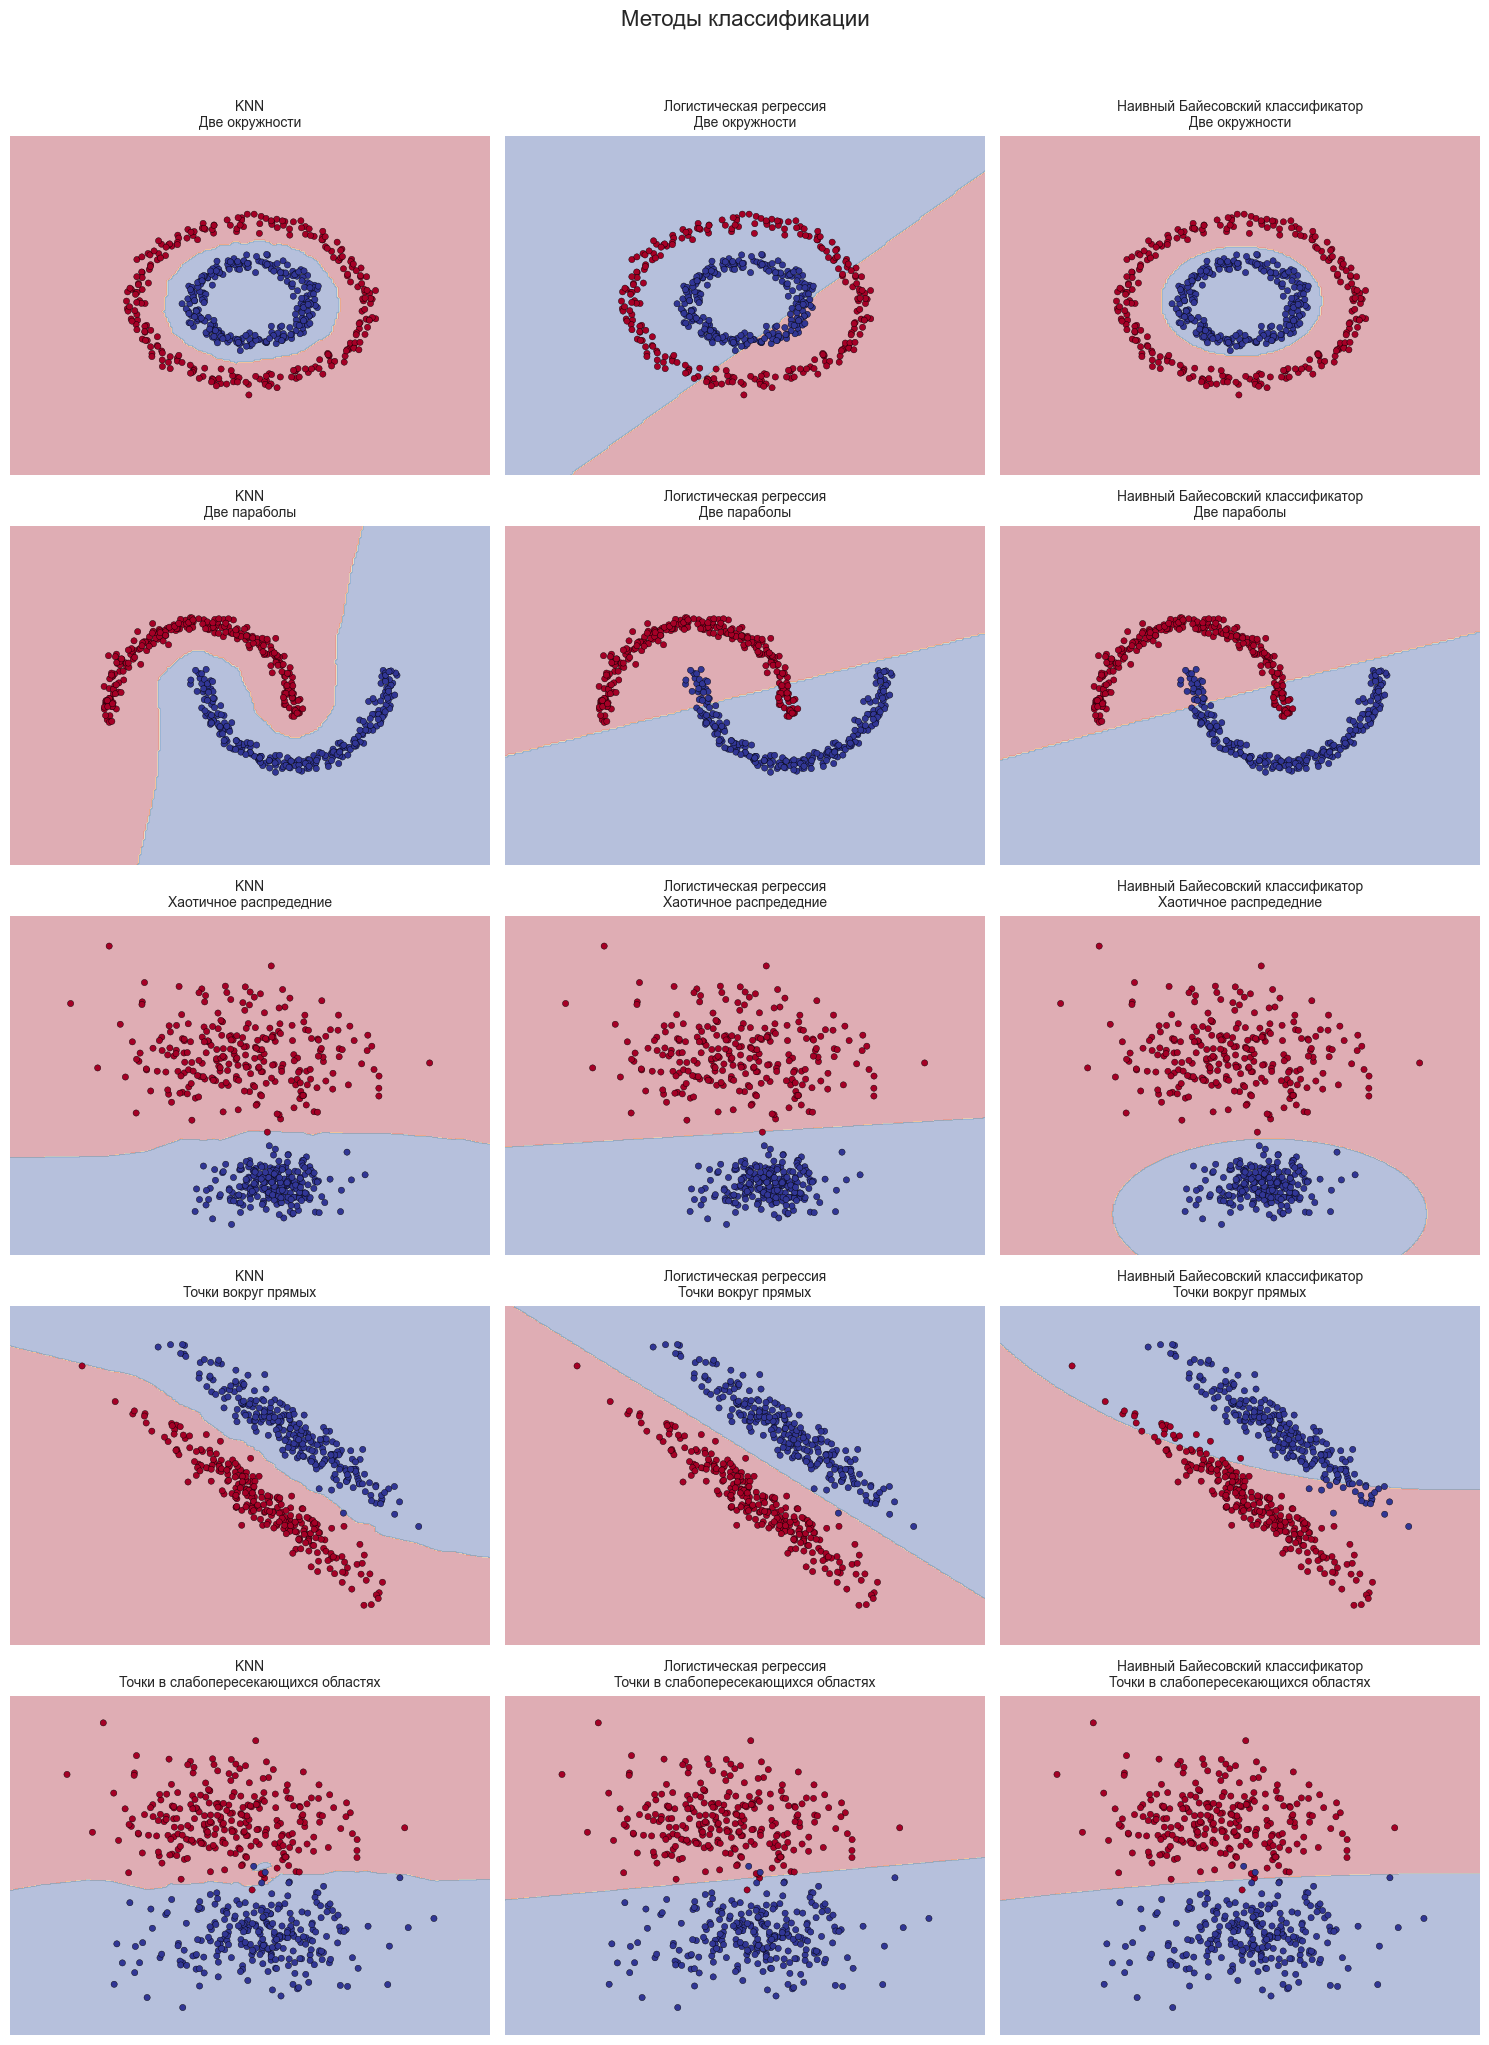

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_moons, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

# Настройка стиля
plt.style.use('seaborn-v0_8')

# Создаем фигуру (5 строк × 3 столбца)
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
fig.suptitle("Методы классификации", fontsize=16, y=1.02)

# Генерация данных
def generate_datasets():
    seed = 30
    datasets = [
        ("Две окружности", make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=seed)),
        ("Две параболы", make_moons(n_samples=500, noise=0.05, random_state=seed)),
        ("Хаотичное распредедние", make_blobs(n_samples=500, cluster_std=[1.0, 0.5], random_state=seed, centers=2)),
        ("Точки вокруг прямых", make_blobs(n_samples=500, random_state=170, centers=2)),
        ("Точки в слабопересекающихся областях", make_blobs(n_samples=500, random_state=seed, centers=2))
    ]
    # Преобразуем анизотропные данные
    transformation = [[0.6, -0.6], [-0.4, 0.8]]
    X_aniso = np.dot(datasets[3][1][0], transformation)
    datasets[3] = ("Точки вокруг прямых", (X_aniso, datasets[3][1][1]))
    return datasets

datasets = generate_datasets()

# Алгоритмы классификации
algorithms = [
    ("KNN", KNeighborsClassifier(n_neighbors=3)),
    ("Логистическая регрессия", LogisticRegression(max_iter=1000)),
    ('Наивный Байесовский классификатор', GaussianNB())
]

# Функция для отрисовки границ
def plot_decision_boundary(ax, model, X, y, cmap='RdYlBu'):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)
    )
                         
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors='k', s=20)

# Заполнение таблицы
for row, (name, (X, y)) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    for col, (algo_name, model) in enumerate(algorithms):
        ax = axes[row, col]
        model.fit(X_train, y_train)
        plot_decision_boundary(ax, model, X, y)
        ax.set_title(f"{algo_name}\n{name}", fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])

plt.tight_layout()
plt.show()